In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None

housing = pd.read_csv('train.csv')

# Imputes NaN values
housing.fillna(value="NA", inplace=True)
housing["LotFrontage"].replace(to_replace="NA", value=0, inplace=True)

# Removes features that are not quantitative and ID column
non_qual_housing = housing.select_dtypes(exclude=[np.object])
non_qual_housing = non_qual_housing.drop(['Id'], axis=1)

# Hierarchical Clustering

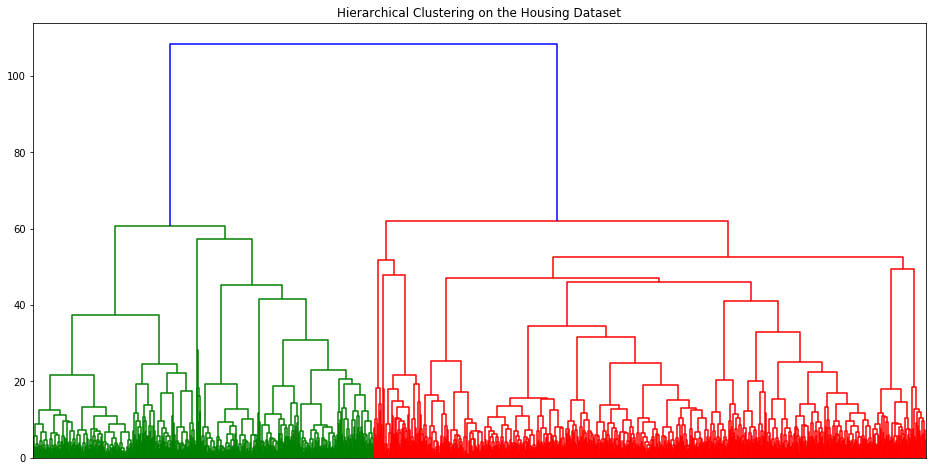

In [6]:
z = linkage(non_qual_housing, "ward")

plt.figure(figsize=(16, 8))
dendrogram(z)

# We can't read the labels since there are so many, so they may as well be turned off
plt.tick_params(axis="x", bottom="off", labelbottom="off")
plt.title("Hierarchical Clustering on the Housing Dataset")
plt.show()

# K-Means

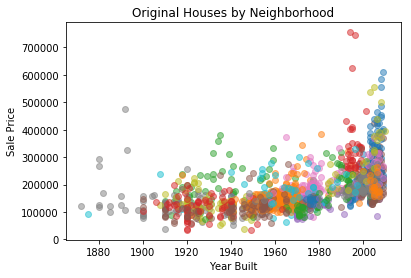

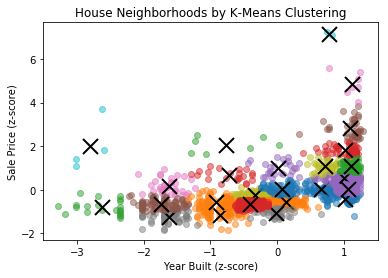

In [3]:
housing.fillna(value="-1", inplace=True)

k = len(housing['Neighborhood'].unique())
for i in housing['Neighborhood'].unique():
    # select only the applicable rows
    ds = housing[housing['Neighborhood'] == i]
    # plot the points
    plt.plot(ds[['YearBuilt']],ds[['SalePrice']],'o', alpha = 0.5)
plt.title("Original Houses by Neighborhood")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

features = housing[["YearBuilt", "SalePrice"]]
features["YearBuilt"] = (housing["YearBuilt"]-housing["YearBuilt"].mean())/housing["YearBuilt"].std()
features["SalePrice"] = (housing["SalePrice"]-housing["SalePrice"].mean())/housing["SalePrice"].std()

kmeans = KMeans(n_clusters=k, algorithm='auto')
kmeans.fit(features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations from the applicable cluster
    ds = features.iloc[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds['YearBuilt'],ds['SalePrice'], 'o', alpha = 0.5)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
plt.title("House Neighborhoods by K-Means Clustering")
plt.xlabel('Year Built (z-score)')
plt.ylabel('Sale Price (z-score)')
plt.show()

# PCA

In [4]:
#Convert non-numerical to categorical integer values
enc = LabelEncoder()
non_qual_housing['SalePrice'] = enc.fit_transform(non_qual_housing['SalePrice'])
non_qual_housing['YearBuilt'] = enc.fit_transform(non_qual_housing['YearBuilt'])

#Scale features using StandardScaler
non_qual_housing = StandardScaler().fit_transform(non_qual_housing)

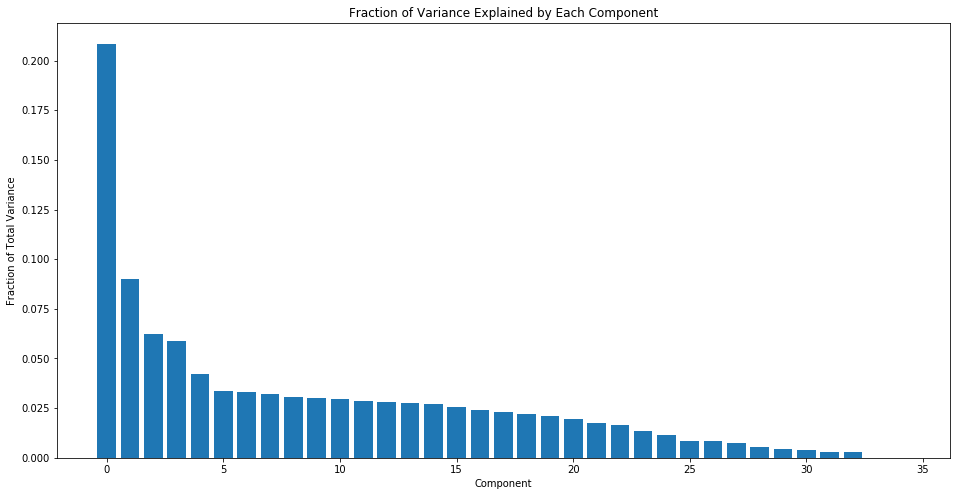

In [5]:
#Perform PCA
pca = PCA().fit(non_qual_housing)

#Plot fraction of variance explained by each component
x = np.arange(35)

plt.figure(figsize=(16, 8))
plt.bar(x, pca.explained_variance_ratio_)
plt.title('Fraction of Variance Explained by Each Component')
plt.xlabel('Component')
plt.ylabel('Fraction of Total Variance')
plt.show()